In [63]:
pip install category_encoders 

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ---------- ----------------------------- 20.5/81.9 kB ? eta -:--:--
   ---------------------------------------- 81.9/81.9 kB 918.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [82]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [42]:
iris = pd.read_excel("Iris-4.xlsx")

In [43]:
iris.head(4)

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [44]:
iris.isna().sum()

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
class        0
dtype: int64

In [45]:
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1]

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [47]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [48]:
Model = DecisionTreeClassifier(max_depth=3,max_leaf_nodes=4)
Model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4)

In [49]:
y_pred = Model.predict(X_test)

In [50]:
cm = confusion_matrix(y_test, y_pred)

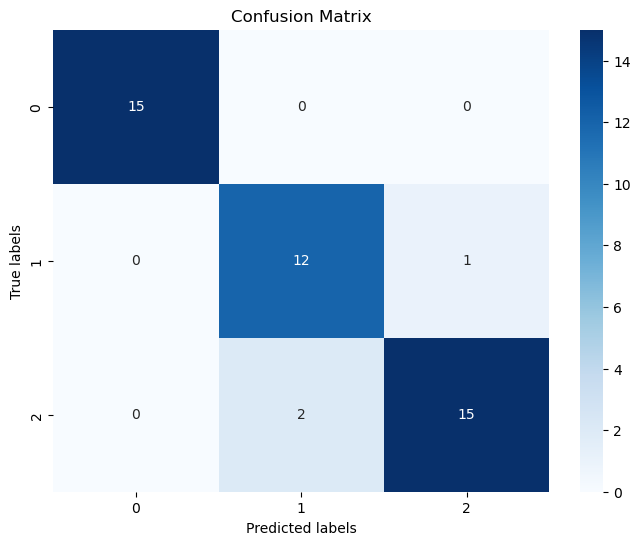

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [52]:
report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.86      0.92      0.89        13
           2       0.94      0.88      0.91        17

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



In [53]:
mycar = pd.read_csv('car_evaluation.csv')

In [54]:
mycar.head(4)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc


In [55]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
mycar.columns = col_names

In [56]:
mycar.head(4)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc


In [58]:
X = mycar.drop(['class'], axis=1) #input/feature vector
y = mycar['class']#target

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [60]:
X_train.shape, X_test.shape

((1208, 6), (519, 6))

In [73]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,3,1,3
932,1,3,3,1,1,3
628,2,2,1,3,1,1
1497,3,2,1,1,3,2
1262,1,4,3,2,3,3


In [74]:
mytree_gini = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)

In [76]:
mytree_gini.fit(X_train, y_train)
#Predict the Test set results with criterion gini index
y_pred_gini = mytree_gini.predict(X_test)

In [79]:
print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.82


In [80]:
Actual_Predicted = {'y_Actual':    y_test,
                    'y_Predicted':  y_pred_gini}
    
df = pd.DataFrame(Actual_Predicted, columns=['y_Actual','y_Predicted'])
df

,y_Actual,y_Predicted
599,unacc,unacc
932,unacc,unacc
628,unacc,unacc
1497,acc,acc
1262,unacc,unacc
...,...,...
490,unacc,unacc
1276,unacc,unacc
287,unacc,unacc
701,unacc,unacc


In [83]:
unique, counts = np.unique(y_pred_gini, return_counts=True)
dict(zip(unique, counts))

{'acc': 170, 'unacc': 349}